# Car Pricing
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Load the dataset
df = pd.read_csv('car_prices.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


## Data Analysis

### Numerical features

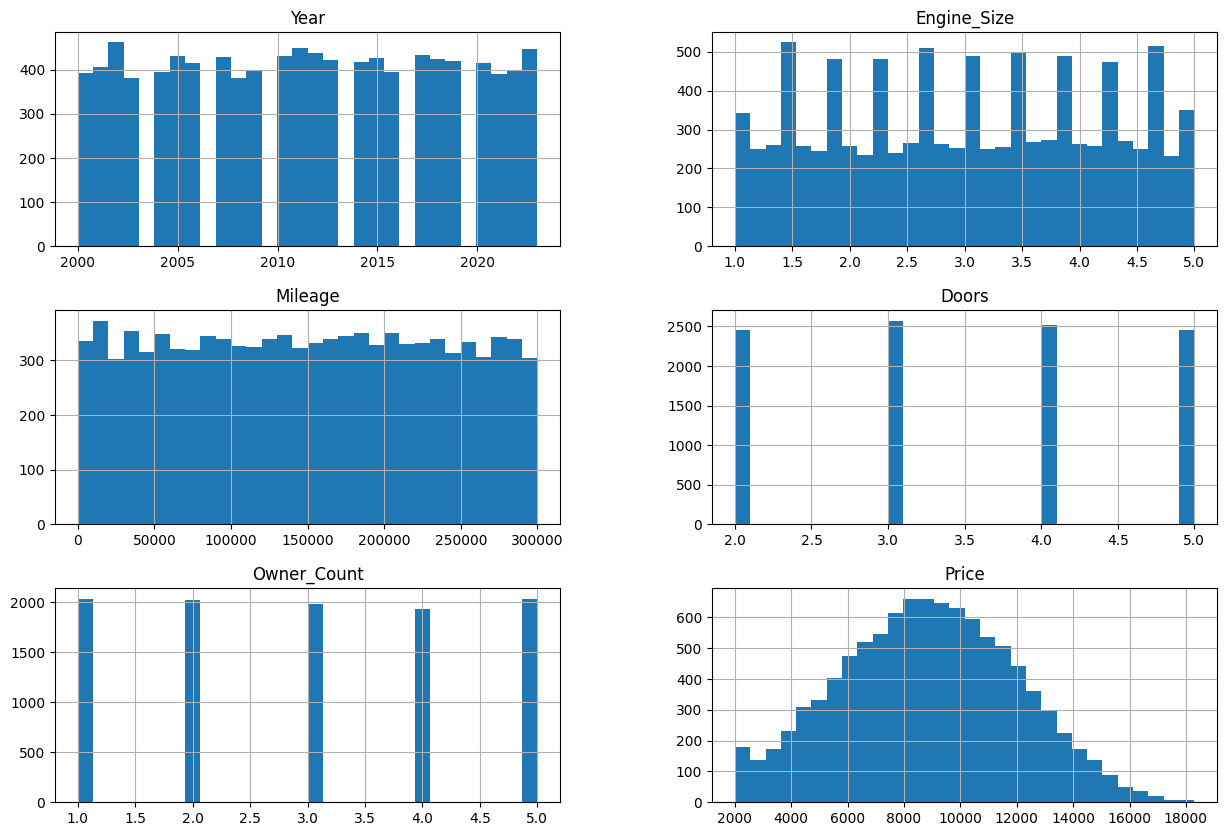

In [13]:
# Numerical features
numerical_features = ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.show()

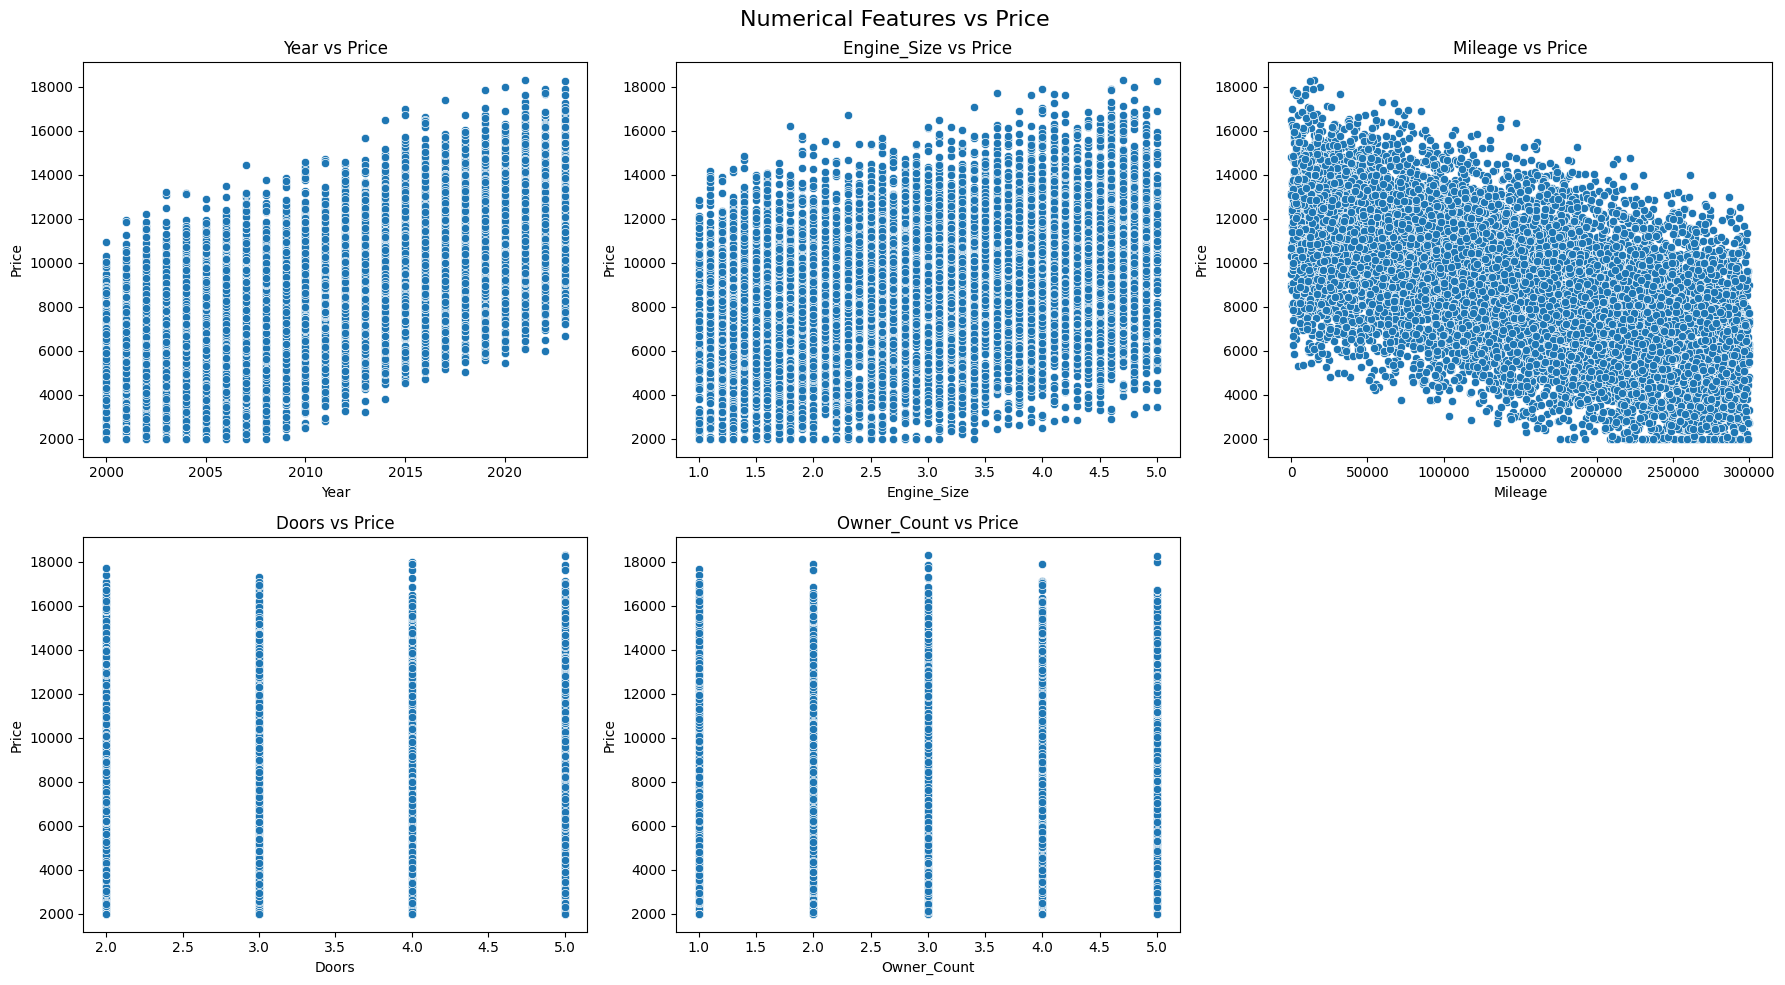

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Numerical Features vs Price', fontsize=16)

for i, feature in enumerate(numerical_features[:-1]):
    row = i // 3
    col = i % 3
    sns.scatterplot(x=feature, y='Price', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Price')

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

### Categorical features

<function matplotlib.pyplot.show(close=None, block=None)>

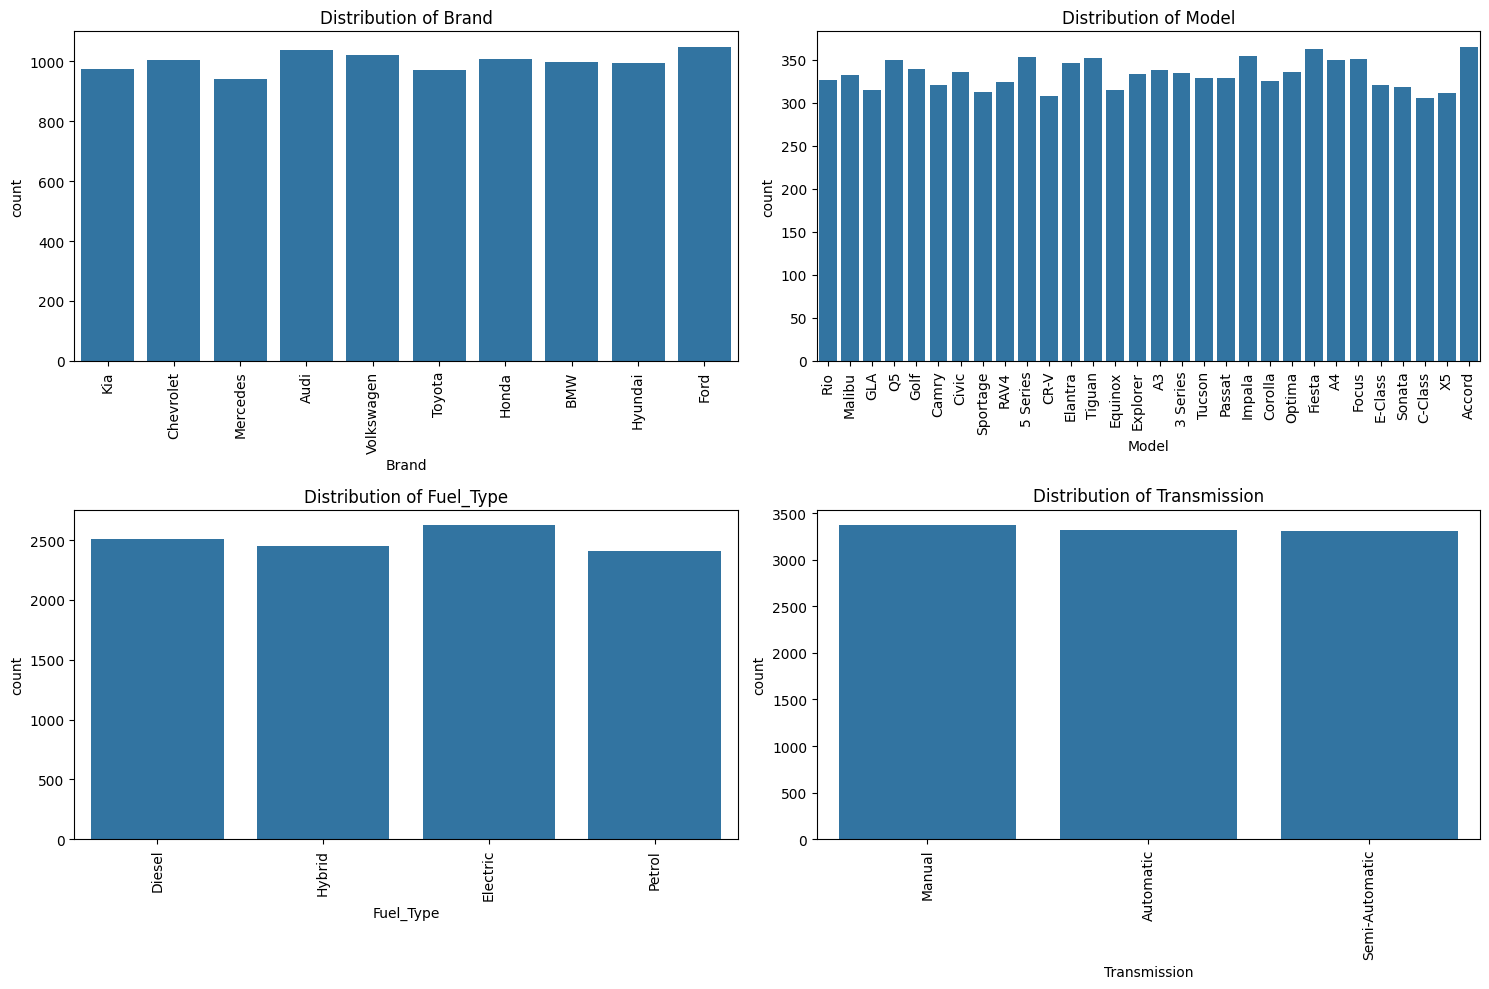

In [23]:
# Categorical features
categorical_features = ['Brand', 'Model', 'Fuel_Type', 'Transmission']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for i, feature in enumerate(categorical_features):
    row = i // 2
    col = i % 2
    sns.countplot(x=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].tick_params(axis='x', rotation=90)
    
    
plt.tight_layout();
plt.show

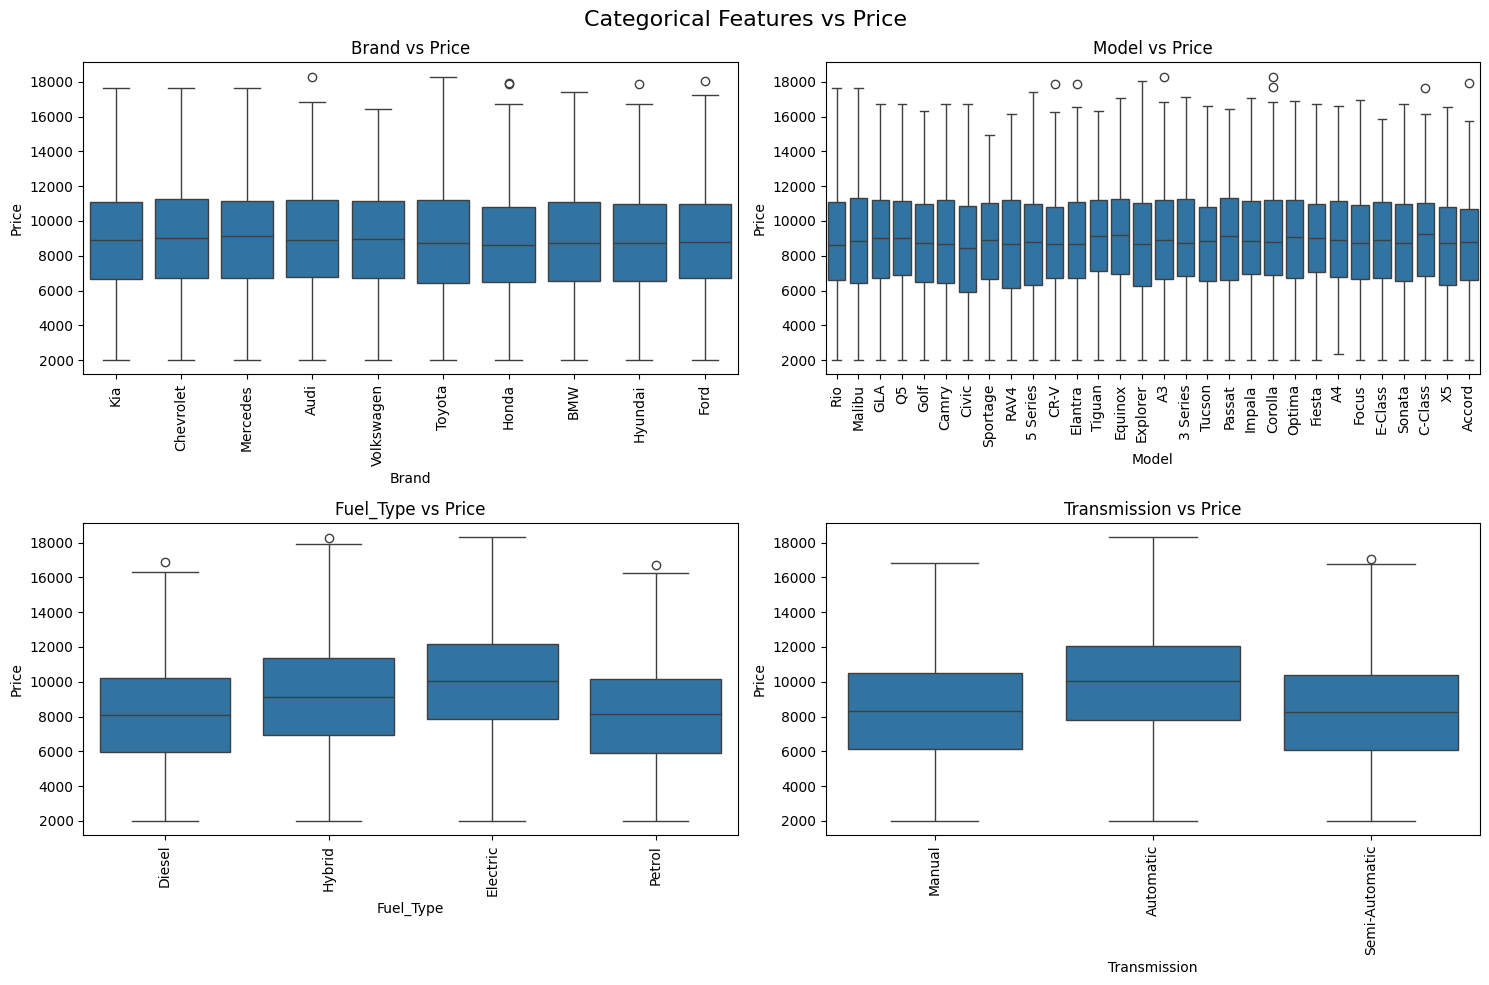

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Categorical Features vs Price', fontsize=16)

for i, feature in enumerate(categorical_features):
    row = i // 2
    col = i % 2
    sns.boxplot(x=feature, y='Price', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Price')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()